In [2]:
# !pip install torch
# !pip install matplotlib

  Using cached torch-2.0.1-cp311-cp311-win_amd64.whl (172.3 MB)
  Using cached filelock-3.12.2-py3-none-any.whl (10 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [3]:
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
# fixes issues with matplotlib
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [5]:
df = pd.read_csv('final_names.csv')
df.head()

,Unnamed: 0,0
0,0,Pie_a_La_Mode
1,1,Celica_A_Mercury
2,2,Konoe_A_Mercury
3,3,Priapus_A_Tarou
4,4,Faalala_Aa_Larm


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72776 entries, 0 to 72775
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72776 non-null  int64 
 1   0           72776 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72776 entries, 0 to 72775
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       72776 non-null  object
dtypes: object(1)
memory usage: 568.7+ KB


In [8]:
df['0']

0            Pie_a_La_Mode
1         Celica_A_Mercury
2          Konoe_A_Mercury
3          Priapus_A_Tarou
4          Faalala_Aa_Larm
               ...        
72771           Finn_Zweig
72772    Albert_Zweinstein
72773               Zwetti
72774      Shenfa_Zwitoque
72775       Dezember_Zwolf
Name: 0, Length: 72776, dtype: object

In [9]:
words = []
for i in range(len(df)):
    words.append((df.iloc[i, 0]).lower())

words

['pie_a_la_mode',
 'celica_a_mercury',
 'konoe_a_mercury',
 'priapus_a_tarou',
 'faalala_aa_larm',
 'torry_aaes',
 'angel_aaltonen',
 'diana_aaman',
 'itsue_aasu',
 'futaba_aasu',
 'hitomi_aasu',
 'nanase_aasu',
 'mitsuki_aasu',
 'mutsumi_aasu',
 'shii_aasu',
 'lashara_aasu_xxviii',
 'kim_aba',
 'iouri_abalkin',
 'renji_abarai',
 'ichika_abarai',
 'robert_abarth',
 'kikunosuke_abashiri',
 'naojirou_abashiri',
 'daemon_abashiri',
 'kichiza_abashiri',
 'goemon_abashiri',
 'naojiro_abashiri',
 'youhei_abashiri',
 'kinzou_abashiri',
 'sosuke_abayama',
 'leone_abbacchio',
 'iino_abbav',
 'fred_abberline',
 'tiffany_abbot',
 'judy_abbott',
 'abbott',
 'majorca_abbott',
 'zach_abdullah',
 'saki_abdusha',
 'takaya_abe',
 'takakazu_abe',
 'katsuya_abe',
 'narumi_abe',
 'kakeru_abe',
 'osamu_abe',
 'shinzo_abe',
 'mitsuru_abe',
 'misae_abe',
 'shousei_abe',
 'shun_abe',
 'tamotsu_abe',
 'seimei_abe',
 'rika_abe',
 'takahiro_abe',
 'kotarou_abe',
 'gonji_abe',
 'hiroshi_abe',
 'jun_abe',
 'tamaki

In [10]:
for i in range(len(words)):
    if '-' in words[i]:
        words[i] = words[i].replace('-', '_')

In [11]:
temp = []
for w in words:
    if '#' not in w:
        temp.append(w)

words = temp.copy()

In [12]:
len(words)

72775

In [15]:
# mapping to & from characters and integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
len(itos)

38

In [54]:
# prepare dataset
block_size = 3 # context length: how many characters we take to predict the next one
X, y = [], []
for w in words:
#     print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        y.append(ix)
#         print(''.join(itos[i] for i in context), '========>', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

In [55]:
X.shape, X.dtype

(torch.Size([1042819, 3]), torch.int64)

In [56]:
y.shape, y.dtype

(torch.Size([1042819]), torch.int64)

In [19]:
C = torch.randn((38, 2))
C

tensor([[ 6.5009e-01,  1.6733e-01],
        [-1.0396e+00,  2.1790e+00],
        [ 4.4110e-01,  3.9510e-01],
        [-1.5272e+00, -1.4449e+00],
        [ 1.3270e+00,  1.6394e+00],
        [ 2.9017e-01,  6.8595e-01],
        [ 1.4853e-01, -2.6408e-01],
        [-5.7762e-01, -2.3435e+00],
        [-2.8053e-01,  5.1451e-01],
        [ 9.4628e-02,  1.1092e+00],
        [-2.1508e-01, -3.8634e-01],
        [ 1.2393e+00,  9.7299e-01],
        [ 2.1992e-01,  1.0256e+00],
        [-7.9312e-04, -3.9960e-01],
        [-2.6044e-02,  1.0016e+00],
        [ 4.7828e-01,  1.1017e-01],
        [ 1.3029e+00, -4.4513e-01],
        [ 2.6314e-01, -1.5460e+00],
        [-4.1018e-02,  1.9205e-02],
        [-1.2284e+00, -8.9428e-01],
        [ 2.9699e-01,  3.3118e-01],
        [-6.8983e-01,  1.9791e-01],
        [-1.3371e+00,  8.8262e-01],
        [ 2.0143e-01, -1.1551e+00],
        [-1.2639e+00,  1.5082e+00],
        [-8.7264e-02, -6.5234e-01],
        [-3.2751e-01,  2.7271e-01],
        [ 4.9721e-01,  1.379

In [20]:
C[3] # accessing embedding of 3rd character

tensor([-1.5272, -1.4449])

In [25]:
F.one_hot(torch.tensor(3), num_classes = 38).float() @ C # accessing embedding of 3rd character. SLOWER

tensor([-1.5272, -1.4449])

#### embedding 

In [26]:
emb = C[X]
emb.shape

torch.Size([14, 3, 2])

In [27]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [29]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
h

tensor([[-0.2796, -0.3900, -0.7792,  ..., -0.1263,  0.6705,  0.7139],
        [ 0.5581, -0.1381, -0.5503,  ..., -0.9595,  0.7400,  0.9977],
        [ 0.9308, -0.7882,  0.7210,  ..., -0.5095, -0.5339,  0.9924],
        ...,
        [ 0.9658, -0.4338,  0.9792,  ..., -0.3834,  0.5835, -0.7429],
        [ 0.5861, -0.6540, -0.8507,  ...,  0.9798,  0.1721,  0.7594],
        [-0.9358, -0.9844, -0.9275,  ...,  0.9836,  0.6004,  0.2058]])

In [30]:
h.shape

torch.Size([14, 100])

In [31]:
W2 = torch.randn((100, 38))
b2 = torch.randn(38)

In [32]:
logits = h @ W2 + b2

In [38]:
logits.shape

torch.Size([14, 38])

In [39]:
counts = logits.exp()

In [42]:
prob = counts / counts.sum(1, keepdim = True)

In [43]:
prob.shape

torch.Size([14, 38])

In [44]:
loss = -prob[torch.arange(14), y].log().mean()
loss

tensor(17.5523)

### clean code

In [57]:
X.shape, y.shape

(torch.Size([1042819, 3]), torch.Size([1042819]))

In [135]:
g = torch.Generator().manual_seed(42)
C = torch.randn((38, 2), generator = g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 38), generator = g)
b2 = torch.randn(38, generator = g)
params = [C, W1, b1, W2, b2]

In [136]:
print('Total parameters:', sum(p.nelement() for p in params))

Total parameters: 4614


In [137]:
for p in params:
    p.requires_grad = True

In [ ]:
# forward pass
emb = C[X] # (14, 3, 2)
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # (14, 100)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdim = True)
loss = -prob[torch.arange(14), y].log().mean()
loss

In [52]:
F.cross_entropy(logits, y) # softmax

tensor(16.0037)

In [53]:
# therefore
loss = F.cross_entropy(logits, y)
loss

tensor(16.0037)

In [153]:
for _ in range(10000):
    
    # performing updates on mini batches (FASTER)
    ix = torch.randint(0, X.shape[0], (32, ))
    
    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 38)
    loss = F.cross_entropy(logits,  y[ix])
#     print(loss.item())

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()
    
    # update
    for p in params:
        p.data += -0.1 * p.grad

       

In [154]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 38)
loss = F.cross_entropy(logits,  y)
print(loss.item())

2.2179553508758545


## Proper method

Creating train, validation and test split

In [155]:
# build dataset

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtrain, Ytrain = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([833821, 3]) torch.Size([833821])
torch.Size([104485, 3]) torch.Size([104485])
torch.Size([104513, 3]) torch.Size([104513])


In [182]:
Xtrain.shape, Ytrain.shape

(torch.Size([833821, 3]), torch.Size([833821]))

In [227]:
g = torch.Generator().manual_seed(42)
C = torch.randn((38, 2), generator = g)
W1 = torch.randn((6, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 38), generator = g)
b2 = torch.randn(38, generator = g)
params = [C, W1, b1, W2, b2]

In [228]:
sum(p.nelement() for p in params)

9114

In [229]:
for p in params:
    p.requires_grad = True

In [230]:
step_i = []
loss_i = []

In [243]:
for i in range(30000):
    
    ix = torch.randint(0, Xtrain.shape[0], (32, ))
    
    emb = C[Xtrain[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytrain[ix])
    
    for p in params:
        p.grad = None
    
    loss.backward()
    
    for p in params:
        p.data += -0.1 * p.grad
    
    step_i.append(i)
    loss_i.append(loss.log10().item())
    
print(loss.item())

2.453488349914551


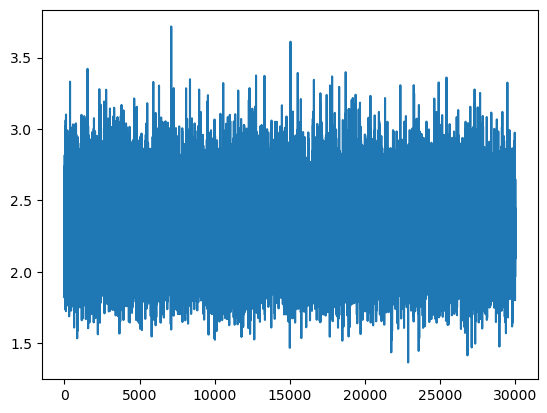

In [244]:
plt.plot(step, lossi);

In [245]:
emb = C[Xtrain]
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,  Ytrain)
loss.item()

2.2552530765533447

In [246]:
emb = C[Xval]
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,  Yval)
loss.item()

2.2619717121124268

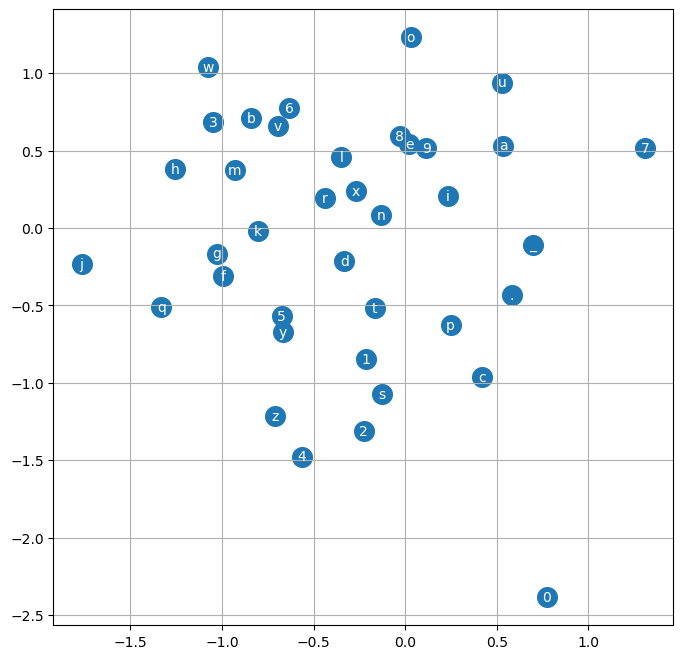

In [249]:
plt.figure(figsize = (8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha = 'center', va = 'center', color = 'white')
plt.grid('minor');

### sampling

In [250]:
g = torch.Generator().manual_seed(42)

for _ in range(20):
    out = [] * block_size
    while True:
        emb = C[torch.tensor([context])] # initialize with '...'
        h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))
    
        

vidherixa.
ref.
rama_shi.
helln_chss_lutsulugo_taka.
himara.
mo_yashirou.
hen.
maki_llemedsuka.
orashirohara.
miya.
kaechirume_koshimagi.
oufa.
hebaka.
shui.
horg_chiur_ollin.
churegurumi_nhel_mita.
nen_ank.
rafami.
motowami_striamette.
cherrls.
